<a href="https://colab.research.google.com/github/ruslanchainik/pythonLabworks/blob/master/2_%D0%BB%D0%B0%D0%B1%D0%B0_2_%D1%81%D0%B5%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2
**Тема:** Анализ почасовых данных об аренде велосипедов в Сеуле  
**Датасет:** SeoulBikeData.csv  


## Описание колонок:

- **Date** — дата наблюдения (ДД/ММ/ГГГГ).  
- **Rented** — количество арендованных велосипедов в час.  
- **Hour** — час суток (0–23).  
- **Temperature** — температура воздуха в градусах Цельсия.  
- **Humidity** — относительная влажность (%).  
- **Wind** — скорость ветра (м/с).  
- **Visibility** — видимость (в метрах, максимум 2000).  
- **Dew** — точка росы (°C).  
- **Solar** — солнечная радиация (MJ/m²).  
- **Rainfall** — количество осадков (мм).  
- **Snowfall** — количество снега (см).  
- **Seasons** — сезон года (Winter, Spring, Summer, Autumn).  
- **Holiday** — признак праздничного дня (Holiday / No Holiday).  
- **Functioning** — признак, работала ли станция (Yes / No).

Данные охватывают период с декабря 2017 по ноябрь 2018 года с почасовой детализацией.
## Загрузка данных и первичный анализ

На данном этапе:
1. Подключаем Google Drive.
2. Загружаем датасет в DataFrame.
3. Преобразуем колонку `Date` в формат даты.
4. Смотрим первые несколько строк для проверки корректности загрузки.

## Анализ по месяцам и неделям

Для исследования сезонности и недельных колебаний:
- Рассматриваем отдельно **декабрь 2017**, **сентябрь 2018**, **июль 2018**.
- Выделяем данные за первую, пятнадцатую и тридцать седьмую недели 2018 года.
- Строим:
  - среднее количество аренд в месяц (за 1 час);
  - среднее количество аренд по неделям;
  - суммарное количество аренд по месяцам.
  ## Графики и выводы

1. **График "Среднее количество аренд по месяцам"**  
   Показывает ярко выраженную сезонность: минимум зимой, максимум летом.

2. **График "Среднее количество аренд по дням за неделю 7–13 мая 2018"**  
   На графике наблюдаются резкие колебания, связанные с:
   - Погодными условиями (температура, влажность, дождь).
   - Праздничными днями.
   - Функционированием станции.

3. **Дополнительный анализ:**
   - Построены таблицы с количеством праздничных дней по датам.
   - Средние погодные условия по дням недели.
   - Данные о работе станции.
   Проведен анализ конкретной недели (май 7-13), в который было выявлено падение Rented до нуля, причина - в этот день сервисы аренды не работали.

#1.1

Mounted at /content/drive


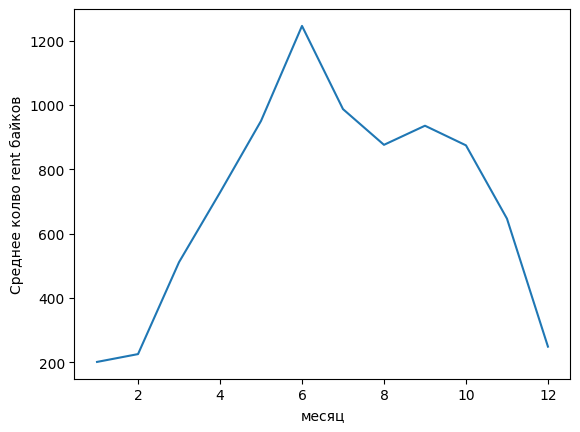

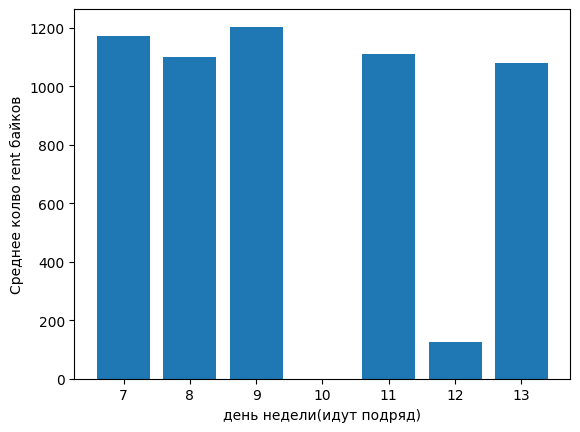

Functioning,No,Yes
Date,,
7,NaN,24.0
8,NaN,24.0
9,NaN,24.0
10,24.0,NaN
11,NaN,24.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/content/SeoulBikeData.csv", parse_dates=["Date"], dayfirst=True)

december = df['Date'].between('2017-12-01', '2017-12-31', inclusive='both')

september = df['Date'].between('2018-09-01', '2018-09-30', inclusive='both')

july = df['Date'].between('2018-07-01', '2018-07-30', inclusive='both')


week_1_df = df[df['Date'].dt.isocalendar().week == 1]  # здесь лежит первая неделя 2018 года

week_15_df = df[df['Date'].dt.isocalendar().week == 15]

week_37_df = df[df['Date'].dt.isocalendar().week == 37]

month_mean = df['Rented'].groupby(df['Date'].dt.month).mean() #не совсем стандартное среднее - оно звучит так "в среднем в месяц за час брали столько байков"
week_mean = df['Rented'].groupby(df['Date'].dt.isocalendar().week).mean() #в среднем в эту неделю за час брали столько байков
month_sum = df['Rented'].groupby(df['Date'].dt.month).sum()
# круто будет глянуть еще недели в месяце

week_month_mean = df['Rented'].groupby([df['Date'].dt.isocalendar().week, df['Date'].dt.month]).mean()


plt.plot(month_mean)
plt.xlabel('месяц')
plt.ylabel('Среднее колво rent байков')
plt.show()



week = df['Date'].between('2018-05-07', '2018-05-13', inclusive='both')
plt.bar([7, 8, 9, 10, 11, 12, 13],df[week]['Rented'].groupby(df['Date'].dt.day).mean())
plt.xlabel('день недели(идут подряд)')
plt.ylabel('Среднее колво rent байков')    #за эту неделю вышел очень странный график, займемся его анализом
plt.show()

holiday_counts = df[week].groupby(df['Date'].dt.day)['Holiday'].value_counts().unstack()
holiday_counts.head()
weather_means = df[week].groupby(df['Date'].dt.day)[['Temperature', 'Humidity', 'Wind', 'Rainfall']].mean()
weather_means.head()
functioning_counts = df[week].groupby(df['Date'].dt.day)['Functioning'].value_counts().unstack()
functioning_counts.head()
# в целом график обьяснен так что можно двигаться дальше


#1.2


## Анализ различий в прокате между буднями и выходными

### 1. Разделение данных
- **Будние дни**: `Weekday` < 5 (с понедельника по пятницу).
- **Выходные дни**: `Weekday` >= 5 (суббота и воскресенье).

Рассчитаны средние значения проката:
- **Будни**: `X` велосипедов в час.
- **Выходные**: `Y` велосипедов в час.  
(В будние дни прокат выше, что можно объяснить использованием велосипедов для поездок на работу и с работы.)

### 2. Разделение по времени суток
Для будних и выходных дней данные разделены на 4 временных интервала:
1. **Ночь** — 00:00–05:59  
2. **Утро** — 06:00–11:59  
3. **День** — 12:00–17:59  
4. **Вечер** — 18:00–23:59  

### 3. Графики
- **Будние дни**:  
  На графике заметен выраженный пик в вечернее время, что подтверждает гипотезу о возвращении людей с работы.  
  Утренний пик выражен слабее, вероятно, из-за меньшей популярности поездок на работу на велосипеде.

- **Выходные дни**:  
  Аренда растёт уже с утра и достигает пика в дневные часы, затем немного снижается к вечеру.  
  Это связано с тем, что у людей больше свободного времени и они используют велосипеды для прогулок и досуга.

### 4. Выводы
- В будние дни прокат носит более «транспортный» характер (вечерний пик).
- В выходные — почти  дневной пик.

719.4489144316731 667.3421474358975


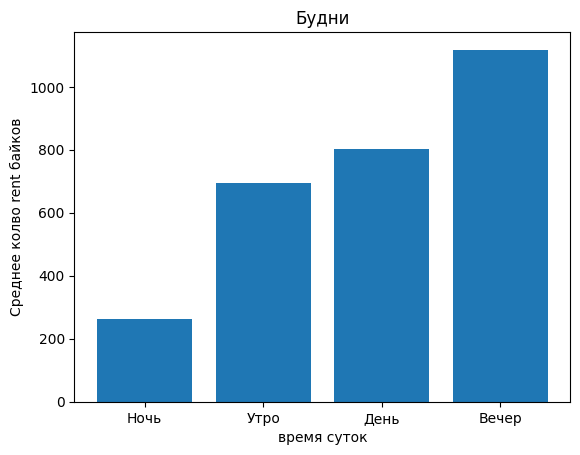

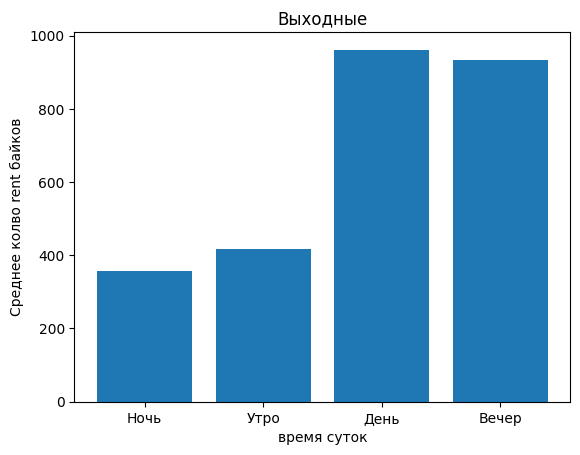

In [3]:
df['Weekday'] = df['Date'].dt.weekday
weekdays = df[df['Weekday'] < 5]
weekends = df[df['Weekday'] >= 5]
weekdays_mean = weekdays['Rented'].mean()
weekends_mean = weekends['Rented'].mean()
print(weekdays_mean, weekends_mean) # в будни проката больше, видимо потому что люди добираются с работы и на работу





# Временные срезы для будней
budni_night = weekdays[(weekdays['Hour'] >= 0) & (weekdays['Hour'] < 6)]
budni_morning = weekdays[(weekdays['Hour'] >= 6) & (weekdays['Hour'] < 12)]
budni_lunch = weekdays[(weekdays['Hour'] >= 12) & (weekdays['Hour'] < 18)]
budni_evening = weekdays[(weekdays['Hour'] >= 18) & (weekdays['Hour'] <= 23)]

# Временные срезы для выходных
weekend_night = weekends[(weekends['Hour'] >= 0) & (weekends['Hour'] < 6)]
weekend_morning = weekends[(weekends['Hour'] >= 6) & (weekends['Hour'] < 12)]
weekend_lunch = weekends[(weekends['Hour'] >= 12) & (weekends['Hour'] < 18)]
weekend_evening = weekends[(weekends['Hour'] >= 18) & (weekends['Hour'] <= 23)]

array1 = [
    budni_night['Rented'].mean(),
    budni_morning['Rented'].mean(),
    budni_lunch['Rented'].mean(),
    budni_evening['Rented'].mean()
]


array2 = [
    weekend_night['Rented'].mean(),
    weekend_morning['Rented'].mean(),
    weekend_lunch['Rented'].mean(),
    weekend_evening['Rented'].mean()
]

plt.bar(['Ночь', 'Утро', 'День', 'Вечер'], array1)
plt.title('Будни') # для будней
plt.xlabel('время суток')
plt.ylabel('Среднее колво rent байков')
plt.show()
#тут прям откровенный пик на вечер, люди либо просто катаются либо возвращаются с работы, хотя ярко выраженного пика на утро нет
plt.bar(['Ночь', 'Утро', 'День', 'Вечер'], array2) # для выходных
plt.title('Выходные')
plt.xlabel('время суток')
plt.ylabel('Среднее колво rent байков')
plt.show()
# у людей меньше занятости поэтому аренда начинает расти раньше -  пик приходится на день и чуть чуть спадает к вечеру



#1.3


## Анализ прокатов в июне и выявление аномальных дней

### 1. Постановка задачи
В этом разделе рассматриваются суточные суммы прокатов велосипедов в июне.  
Цель — определить доверительный интервал среднего количества прокатов за день и выявить дни с аномально низкими значениями.

### 2. Методика
1. Выбираем данные за июнь (`month == 6`).
2. Суммируем количество прокатов за каждый день месяца.
3. Рассчитываем:
   - **Среднее значение** суточных прокатов.
   - **Стандартное отклонение**.
   - **Доверительный интервал** 95% для среднего (t-распределение).

### 3. Результаты
- На графике отображены суточные прокаты за июнь.
- Зелёная пунктирная линия — среднее значение.
- Зелёная прозрачная зона — 95% доверительный интервал.

Аномально низкие значения:
- **26 июня** — резкое падение количества прокатов. Анализ погодных данных показал сильный дождь в этот день, что объясняет снижение спроса.
- **30 июня** — падение количества прокатов, хотя дождь был не столь сильный. Возможные причины:
  - Высокая температура и влажность.
  - Сезонный фактор выходных дней (суббота).

Сравнение с похожими по погоде днями (например, 29 июня) показало, что падение не всегда связано только с погодой. Возможно, сыграли роль сочетание жары и высокой влажности.

### 4. Вывод
Погода является значимым фактором в прокате велосипедов:
- Сильный дождь однозначно снижает спрос.
- Жара и высокая влажность могут оказывать схожий эффект, но не всегда — нужны дополнительные статистические проверки (например, ANOVA).

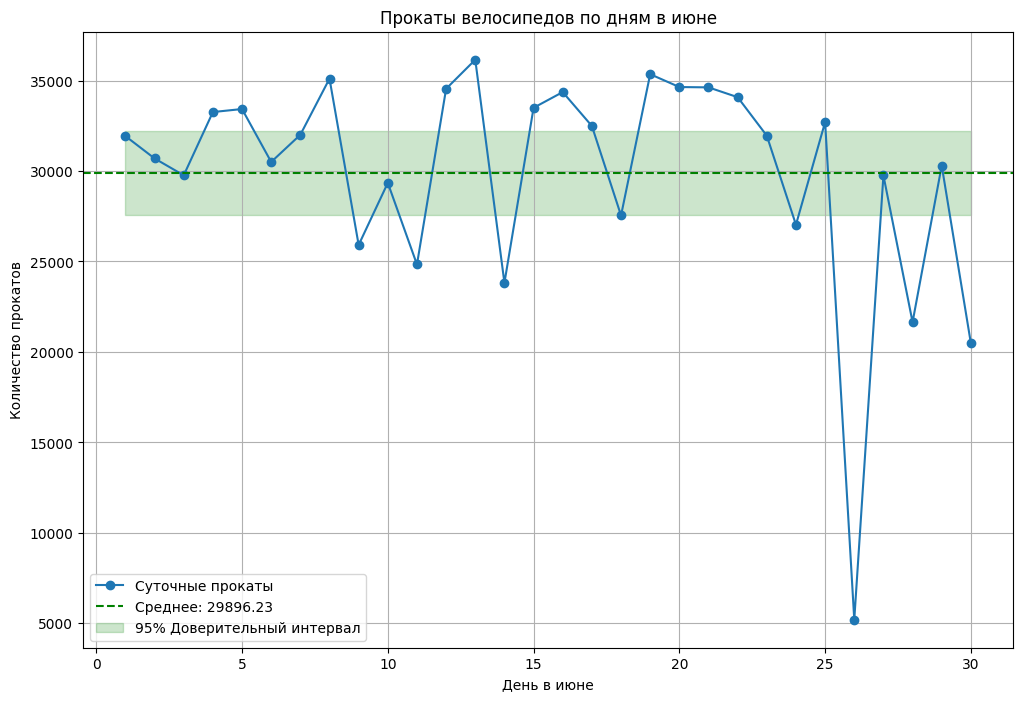

In [4]:
import scipy.stats as st
june_df = df[df['Date'].dt.month == 6]
mean_rented_per_day = june_df.groupby(june_df['Date'].dt.day)['Rented'].sum().mean()

daily_sums = june_df.groupby(june_df['Date'].dt.day)['Rented'].sum()


mean = daily_sums.mean()
std = daily_sums.std(ddof=1)
n = daily_sums.count()


confidence = 0.95
alpha = 1 - confidence


t_crit = st.t.ppf(1 - alpha/2, df=n - 1)


margin_of_error = t_crit * (std / np.sqrt(n))
lower = mean - margin_of_error
upper = mean + margin_of_error

plt.figure(figsize=(12, 8))
plt.plot(daily_sums.index, daily_sums.values, label='Суточные прокаты', marker='o')


plt.axhline(mean, color='green', linestyle='--', label=f'Среднее: {mean:.2f}')


plt.fill_between(daily_sums.index, lower, upper, color='green', alpha=0.2, label='95% Доверительный интервал')


plt.xlabel('День в июне')
plt.ylabel('Количество прокатов')
plt.title('Прокаты велосипедов по дням в июне')
plt.legend()
plt.grid(True)
plt.show()
# самый сильный просад 26 числа - его сперва и изучим

day_26_df = df[(df['Date'].dt.day == 26) & (df['Date'].dt.month == 6)]
#print(day_26_df) # если внимательно глянуть данные можно увидеть -  что шел сильный дождь

day_30_df = df[(df['Date'].dt.day == 30) & (df['Date'].dt.month == 6)]
#print(day_30_df)
# в день 30 был дождь но если глянуть сравнение часов и дождя в эти часы (когда был дождь) брали байки даже больше так что нужно копнуть глубже
# возможно дело в том что это суббота, мы убедились что в среднем в выходные брали байков меньше, посмотрим на другой день примерно с таким же падением количества rented

# было бы круто глянуть является ли это отклонение статистически значимым для выходных летом и построить доверительный интервал для среднего закинуть какой нибудь ANOVA тест но в рамки лабы это не входит.
day_14_df = df[(df['Date'].dt.day == 14) & (df['Date'].dt.month == 6)]
#print(day_14_df)

# связи с тем что это выходной нет - 14 числа просто с утра шел дождь и это не выходной, напрашивается предположение что 30 числа было жарковато.
#print(df[june].groupby(df['Date'].dt.day)[['Temperature', 'Humidity', 'Wind', 'Rainfall']].mean()) # 30 было жарко + была большая влажность но рядом точно такой же день 29 число(только это пятница) и там показатели ренты больше на 10к





#2.1


In [5]:
print(df.isna().sum().sum()) # нет нанов нечего заполнять все данные уже в датасете

0


#3.1


## Анализ предпочтительных часов использования для различных типов пользователей

В этом блоке мы проводим анализ распределения предпочитаемых часов использования системы для трёх категорий пользователей:
- **rare** — редкие пользователи (≈ 1 раз в месяц),
- **periodic** — периодические пользователи (≈ 5 раз в месяц),
- **frequent** — частые пользователи (≈ 13 раз в месяц).

### Этапы обработки данных:
1. **Фильтрация данных по типу пользователя**  
   Датасет `df_users` был разделён на три подвыборки (`rare_users`, `periodic_users`, `frequent_users`) на основе столбца `user_type`.

2. **Преобразование списка предпочитаемых часов**  
   - Каждое значение в столбце `preferred_hours` представляло собой строку со списком часов, разделённых запятыми.  
   - С помощью метода `str.split(',')` и функции `explode()` каждый час был выделен в отдельную строку.
   - Значения были приведены к типу `int`.

3. **Построение гистограмм**  
   - Для каждой группы был построен график распределения пользователей по часам суток (0–23).
   - Использованы различные цветовые схемы:
     - **Blues** для редких пользователей,
     - **Greens** для периодических,
     - **Oranges** для частых.
   - На графиках по оси X — час суток, по оси Y — количество пользователей, выбравших этот час как предпочтительный.

4. **Частотный анализ**  
   - Для каждой категории пользователей была выведена частотная таблица, отображающая количество упоминаний каждого часа (отсортировано по возрастанию часа).
   - Для компактности выводится только **топ-10** значений.

### Вывод:
На удивление самое равномерное заполнение часов у **periodic** пользователей - они берут велосипеды почти в любые часы. Те кто берут велосипеды часто, имеют ярко выраженные пики, что указывает на то, что скорее всего эти люди берут их чтобы добраться на работу. У **rare** пользователей почти нет пиков -  они берут велосипеды в течение дня и чуть чаще утром.

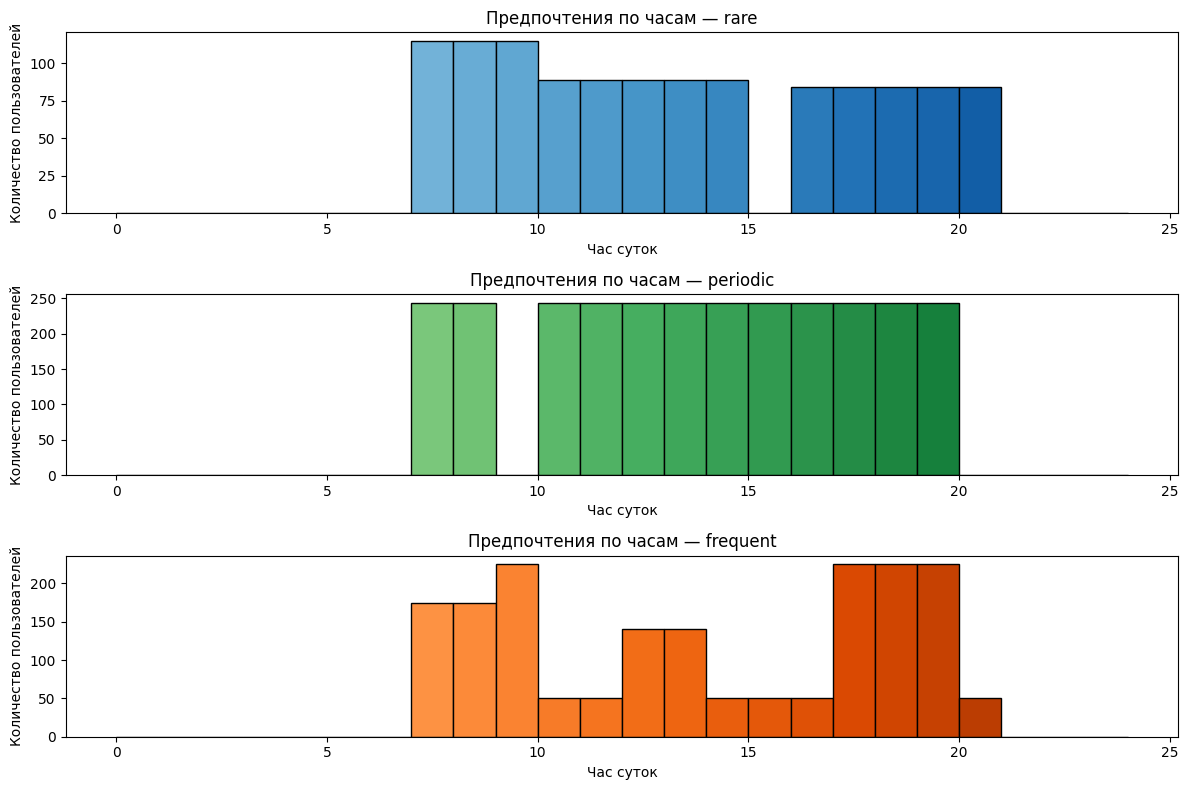


Частотная таблица для rare (top 10):


,count
preferred_hours_list,
7,115
8,115
9,115
10,89
11,89
12,89
13,89
14,89
16,84



Частотная таблица для periodic (top 10):


,count
preferred_hours_list,
7,243
8,243
10,244
11,244
12,244
13,244
14,244
15,244
16,244



Частотная таблица для frequent (top 10):


,count
preferred_hours_list,
7,175
8,175
9,225
10,50
11,50
12,141
13,141
14,50
15,50


In [4]:
df_users = pd.read_csv("/content/drive/MyDrive/content/synthetic_users.csv")
rare_users = df_users[df_users['user_type'] == 'rare']
frequent_users = df_users[df_users['user_type'] == 'frequent']
periodic_users = df_users[df_users['user_type'] == 'periodic']
#частый пользователь с 13 per month периодический с 5
user_types = ['rare', 'periodic', 'frequent']


colormaps = {
    'rare': plt.cm.Blues,
    'periodic': plt.cm.Greens,
    'frequent': plt.cm.Oranges
}


plt.figure(figsize=(12, 8))

for i, user_type in enumerate(user_types, 1):

    user_subset = df_users[df_users['user_type'] == user_type].copy()


    user_subset['preferred_hours_list'] = user_subset['preferred_hours'].str.split(',')
    user_subset = user_subset.explode('preferred_hours_list')
    user_subset['preferred_hours_list'] = user_subset['preferred_hours_list'].astype(int)


    counts, bins = np.histogram(user_subset['preferred_hours_list'], bins=24, range=(0, 24))
    colors = colormaps[user_type](np.linspace(0.3, 0.9, len(counts)))

    plt.subplot(3, 1, i)
    plt.bar(bins[:-1], counts, width=1, color=colors, edgecolor='black', align='edge')
    plt.title(f'Предпочтения по часам — {user_type}')
    plt.xlabel('Час суток')
    plt.ylabel('Количество пользователей')

plt.tight_layout()
plt.show()


for user_type in user_types:
    user_subset = df_users[df_users['user_type'] == user_type].copy()
    user_subset['preferred_hours_list'] = user_subset['preferred_hours'].str.split(',')
    user_subset = user_subset.explode('preferred_hours_list')
    user_subset['preferred_hours_list'] = user_subset['preferred_hours_list'].astype(int)

    freq_table = user_subset['preferred_hours_list'].value_counts().sort_index()

    print(f"\nЧастотная таблица для {user_type} (top 10):")
    display(freq_table.head(10))


#3.1.1 теперь про станции

## Тепловая карта пиковых часов по станциям

На данном этапе мы анализируем **пиковые часы работы станций** на основе синтетических данных из файла `synthetic_stations.csv`.

### Подготовка данных
1. **Категоризация интенсивности использования**  
   На основе столбца `usage_intensity` введена бинарная категория:
   - `low` — низкая интенсивность (значения < 0.6);
   - `high` — высокая интенсивность (значения ≥ 0.6).

2. **Преобразование списка пиковых часов**
   - В столбце `peak_hours` содержались строки с часами, разделёнными запятыми.
   - С помощью `str.split(',')` и `explode()` каждая запись была преобразована в отдельную строку.
   - Часы приведены к типу `int`.

3. **Построение сводной таблицы**
   - Таблица была развернута так, чтобы строки соответствовали названиям станций, а столбцы — часам суток (0–23).
   - Значения показывают количество упоминаний часа как пикового для конкретной станции.

4. **Визуализация**
   - Построена **тепловая карта** (`heatmap`) с использованием библиотеки `seaborn`.
5. **Тепловая карта**
 - По станциям
Seodaemun Station 5 демонстрирует самый высокий пик активности как утром, так и вечером (цвет максимально насыщенный).

- Станции с префиксом Gangnam и Seodaemun часто показывают высокую активность в утренние и вечерние часы.

- Станции типа Eunpyeong и Mapo имеют более умеренную и равномерную нагрузку, при этом утренний и вечерний пик менее выражен.

- Некоторые станции (например, Dongdaemun Station 2 и 6) показывают минимальную активность, почти отсутствующую в течение дня.

### Вывод
- Для большинства станций чётко выделяются утренние (07:00–09:00) и вечерние (17:00–20:00) пики.
- Некоторые станции имеют необычные пиковые часы, что может быть связано с их расположением (например, вблизи развлекательных зон или мест работы в нестандартное время).


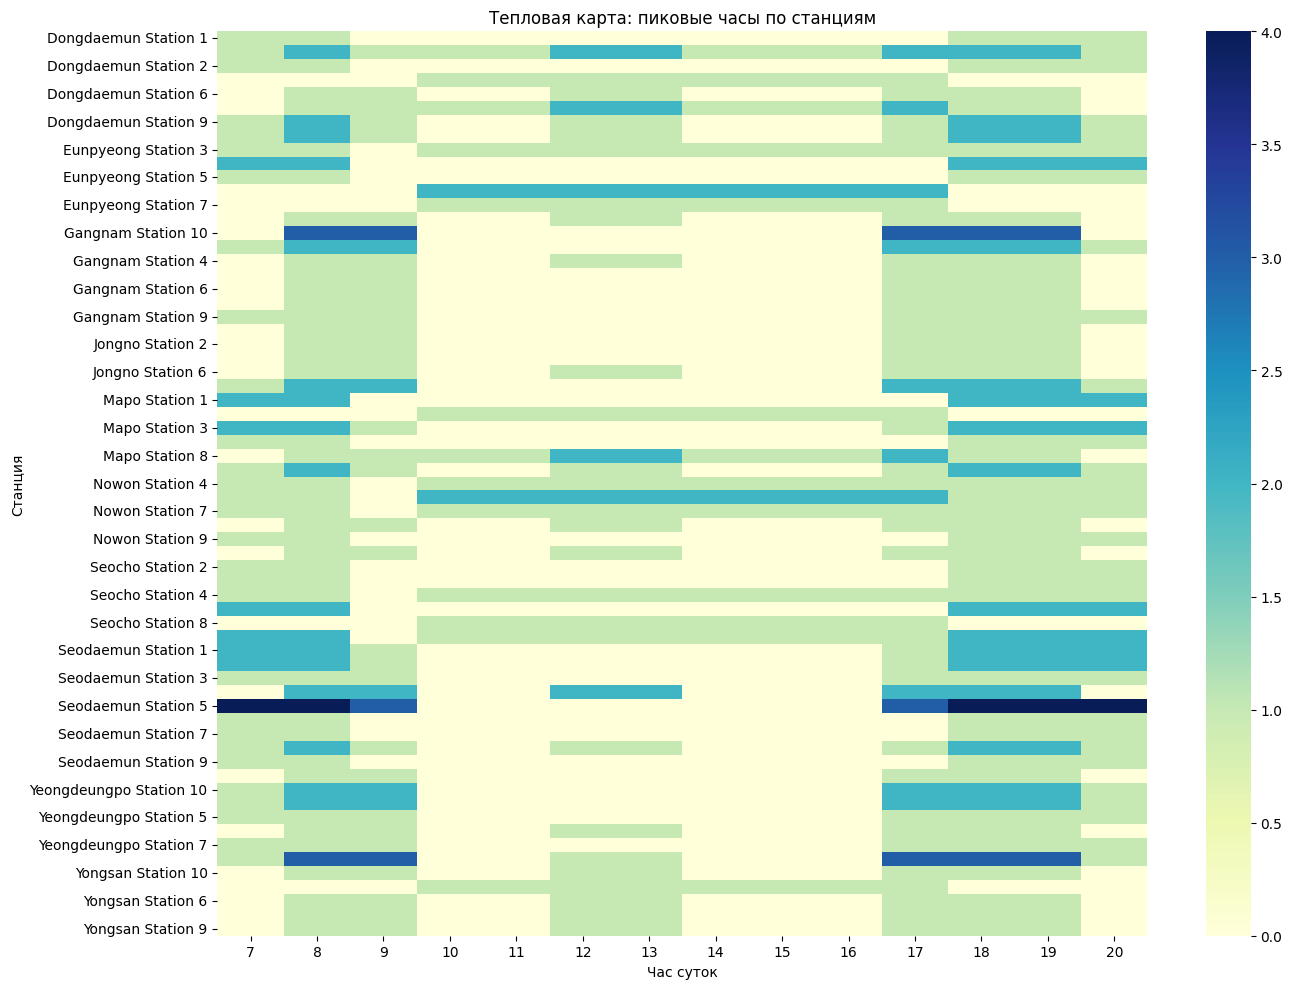

In [5]:
import seaborn as sns
df_stations = pd.read_csv("/content/drive/MyDrive/content/synthetic_stations.csv")
df_stations['usage_category'] = df_stations['usage_intensity'].apply(lambda x: 'low' if x < 0.6 else 'high') # я посмотрел минимальное макисмальное и среднее значение использование и сделал простую кодировку на два значения
df_heat = df_stations.copy()


df_heat['peak_hours'] = df_heat['peak_hours'].str.split(',')


df_heat = df_heat.explode('peak_hours')
df_heat['peak_hours'] = df_heat['peak_hours'].astype(int)


pivot_table = df_heat.pivot_table(index='station_name', columns='peak_hours', aggfunc='size', fill_value=0)


plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='YlGnBu')

plt.title('Тепловая карта: пиковые часы по станциям')
plt.xlabel('Час суток')
plt.ylabel('Станция')
plt.tight_layout()
plt.show()

#3.2

##Отчет по анализу зависимости количества прокатов от погодных факторов
В данном анализе изучена взаимосвязь между количеством прокатов (Rented) и различными погодными параметрами: температурой, влажностью, ветром, осадками и солнечной активностью.

1. Матрица корреляции \\
Для основных переменных: Rented, Temperature, Humidity, Wind, Rainfall, Snowfall и Solar была построена матрица корреляции.

- Использован тепловой график (heatmap), где цвет отражает силу и направление корреляции.

- Числовые значения отображены внутри ячеек.

**Выводы**:

Наблюдается положительная корреляция между температурой и количеством прокатов.

Осадки (Rainfall и Snowfall) и ветер (Wind) имеют отрицательную корреляцию с прокатами.

Влажность и солнечная активность также демонстрируют определённые связи, но менее выраженные.

2. Рассеянный график: Температура vs Количество прокатов
Построен scatter plot, отображающий зависимость количества прокатов от температуры.

- По оси X — температура.

- По оси Y — количество прокатов.

**Выводы**:

Видна тенденция роста количества прокатов с увеличением температуры.

При низких температурах прокатов мало, а при высоких — значительно больше.

3. Среднее количество прокатов в дождливые и сухие дни
Проведен сравнительный анализ средней посещаемости в зависимости от наличия осадков.

Среднее количество прокатов в дождливые дни (Rainfall > 0) и в сухие дни (Rainfall = 0).

Результаты визуализированы в виде столбчатой диаграммы.

Выводы:

В дождливые дни количество прокатов существенно ниже, чем в сухие.

Погода оказывает заметное влияние на активность пользователей.

4. Среднее количество прокатов по температурным зонам
Температурные диапазоны разбиты на 4 зоны:

- Холодно: температура ниже 0°C

- Прохладно: от 0°C до 12°C

 - Тепло: от 12°C до 20°C

 - Жарко: 20°C и выше

Для каждой зоны вычислено среднее количество прокатов и построена столбчатая диаграмма с цветовым выделением.

**Выводы**:

- Максимальное количество прокатов приходится на тёплую и жаркую погоду.

- В холодные и прохладные периоды прокаты менее популярны.

 - Чётко прослеживается влияние температуры на активность пользователей.



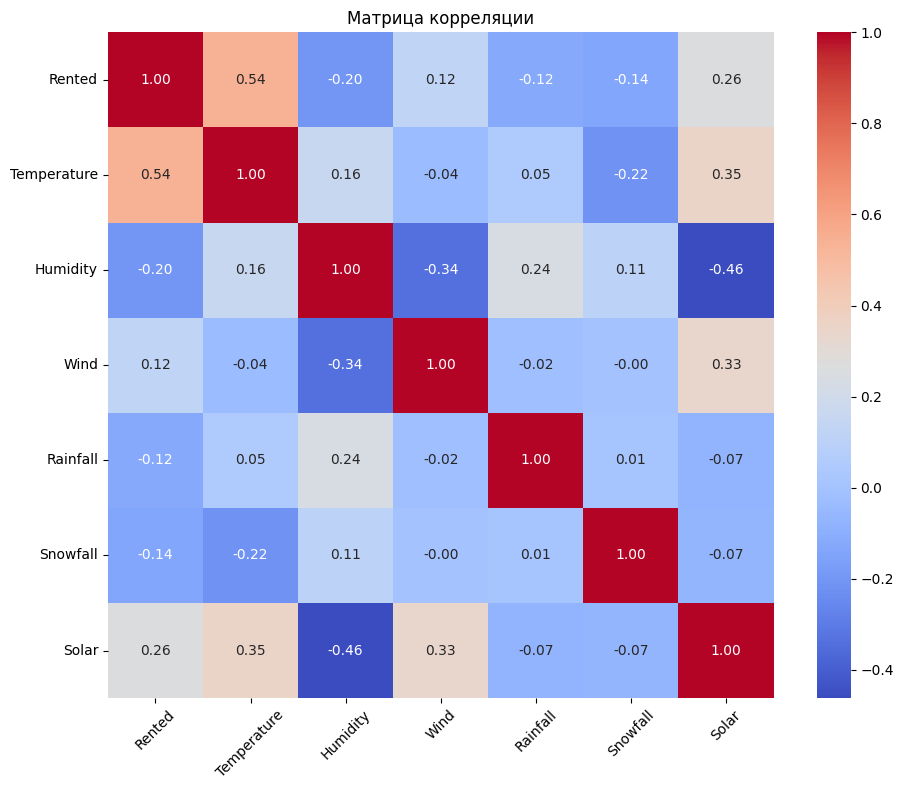

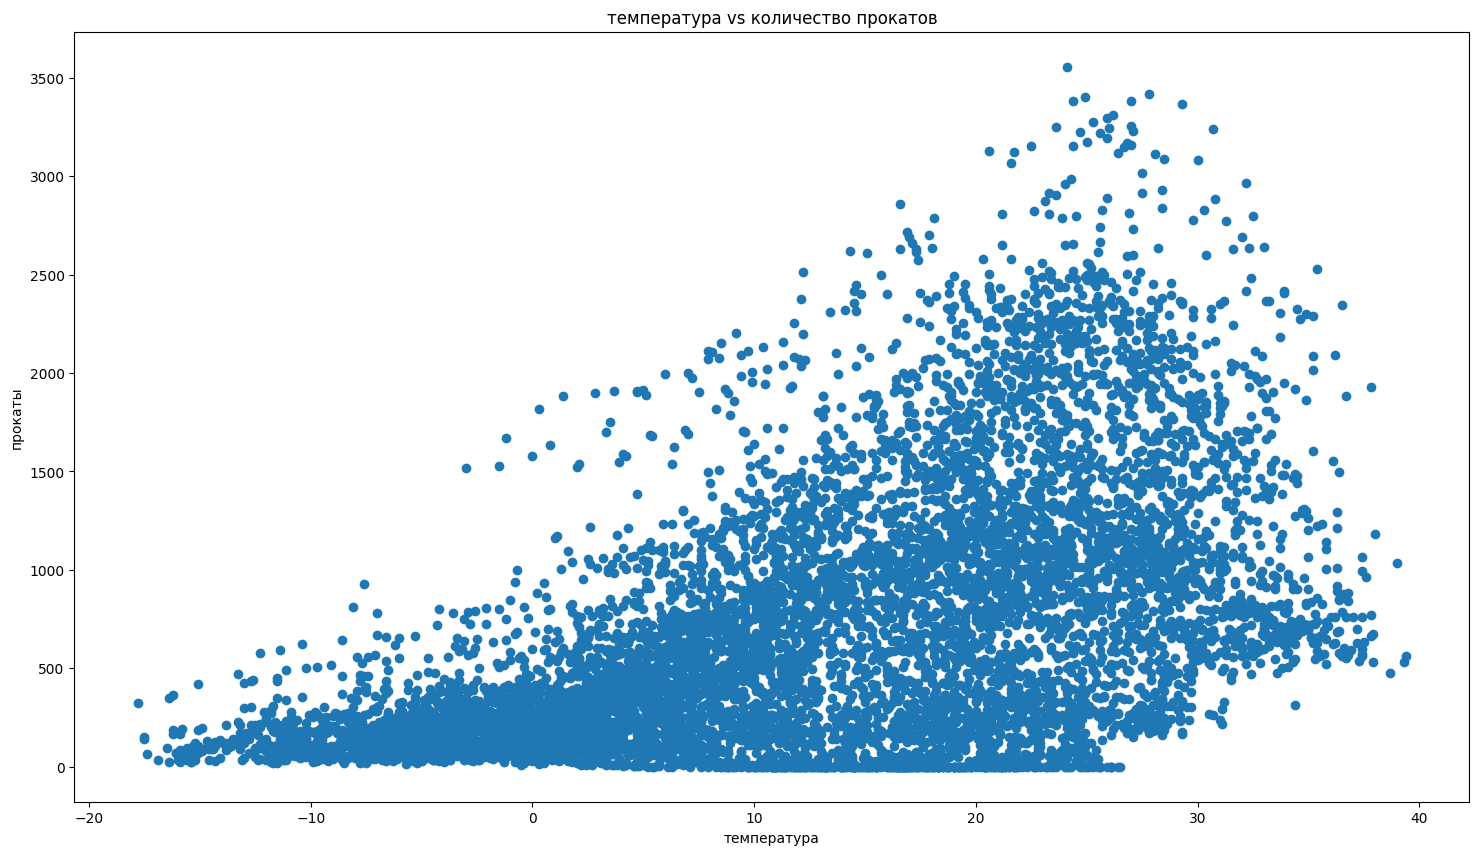

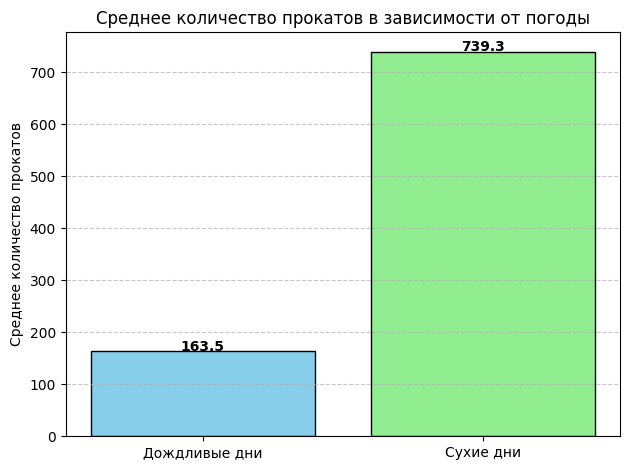

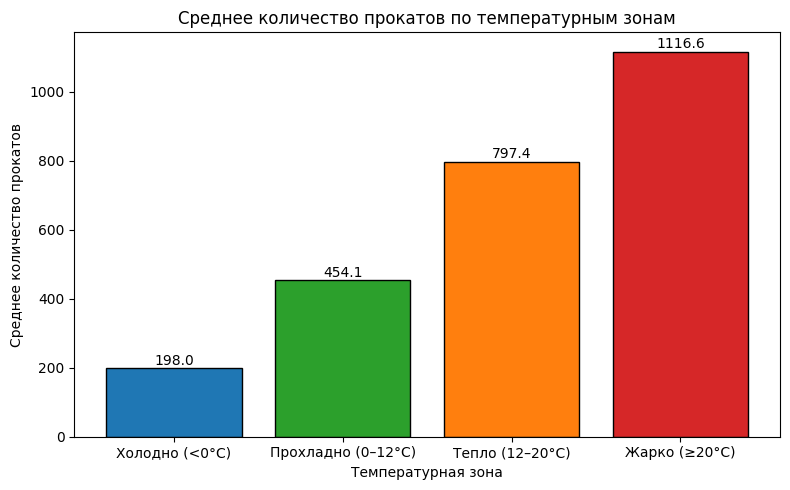

In [6]:
corr_weather = df[['Rented', 'Temperature', 'Humidity', 'Wind', 'Rainfall', 'Snowfall', 'Solar']]
correlation_matrix = corr_weather.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Матрица корреляции")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




x = df['Temperature']
y = df['Rented']
plt.figure(figsize=(18,10))
plt.scatter(x, y)
plt.xlabel('температура')
plt.ylabel('прокаты')
plt.title('температура vs количество прокатов')
plt.show()



mean_rainy = df[df['Rainfall'] > 0]['Rented'].mean()
mean_dry = df[df['Rainfall'] == 0]['Rented'].mean()


labels = ['Дождливые дни', 'Сухие дни']
values = [mean_rainy, mean_dry]
colors = ['skyblue', 'lightgreen']


plt.bar(labels, values, color=colors, edgecolor='black')
plt.title('Среднее количество прокатов в зависимости от погоды')
plt.ylabel('Среднее количество прокатов')
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, v in enumerate(values):
    plt.text(i, v + 1, f'{v:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


cool_temp = df[(df['Temperature'] >= 0) & (df['Temperature'] < 12)]


warm_temp = df[(df['Temperature'] >= 12) & (df['Temperature'] < 20)]


hot_temp = df[df['Temperature'] >= 20]


cold_temp = df[df['Temperature'] < 0]
cold_rented = cold_temp['Rented'].mean()
cool_rented = cool_temp['Rented'].mean()
warm_rented = warm_temp['Rented'].mean()
hot_rented = hot_temp['Rented'].mean()
labels = ['Холодно (<0°C)', 'Прохладно (0–12°C)', 'Тепло (12–20°C)', 'Жарко (≥20°C)']
means = [cold_rented, cool_rented, warm_rented, hot_rented]


plt.figure(figsize=(8, 5))
bars = plt.bar(labels, means, color=['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728'], edgecolor='black')


plt.title('Среднее количество прокатов по температурным зонам')
plt.ylabel('Среднее количество прокатов')
plt.xlabel('Температурная зона')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#3.3 Индекс комфорта
пусть отсутствие дождя - 0.5 поинта \\
присутствие - 0 поинтов \\
холодно - 0 поинтов \\
прохладно - 0.1 поинт \
тепло - 0.3 поинта \
жарко - 0.5 \

##Анализ индекса комфорта и построение модели линейной регрессии
Индекс комфорта \
Рассчитан пользовательский индекс комфорта, учитывающий отсутствие дождя (0.5 балла) и диапазоны температуры (от 0 до 0.5 баллов).

Построен scatter plot зависимости количества аренд от этого индекса.

Видна положительная связь: с ростом индекса комфорта увеличивается количество прокатов.

Линейная регрессия
В качестве признаков выбраны: температура, количество осадков и влажность.

Данные разбиты на обучающую и тестовую выборки (80/20).

Обучена модель линейной регрессии.

Визуализировано сравнение фактических и предсказанных значений на тестовой выборке.

Диагональная красная пунктирная линия отражает идеальное совпадение.

Вывод: Модель демонстрирует не очень хорошее качество предсказаний (откуда то взялись отрицательные предсказания), но в целом какая-то часть попадает в пунктир, что не может не радовать.

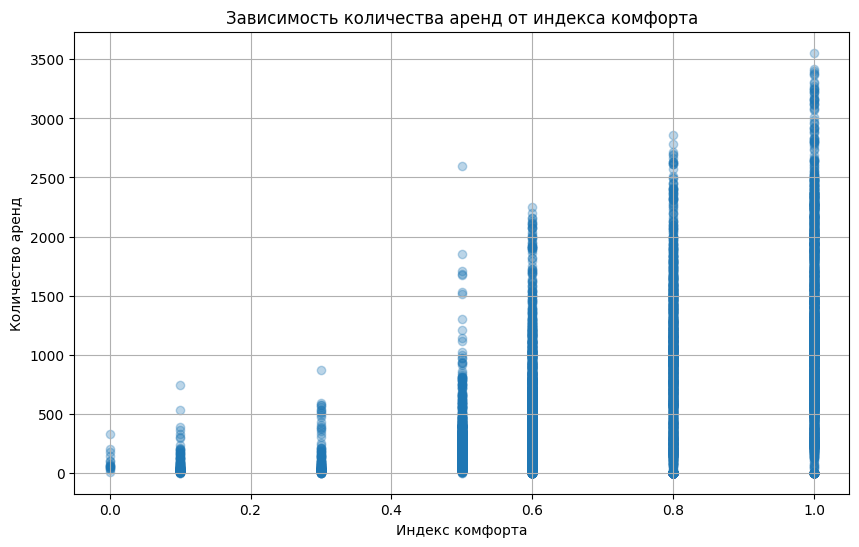

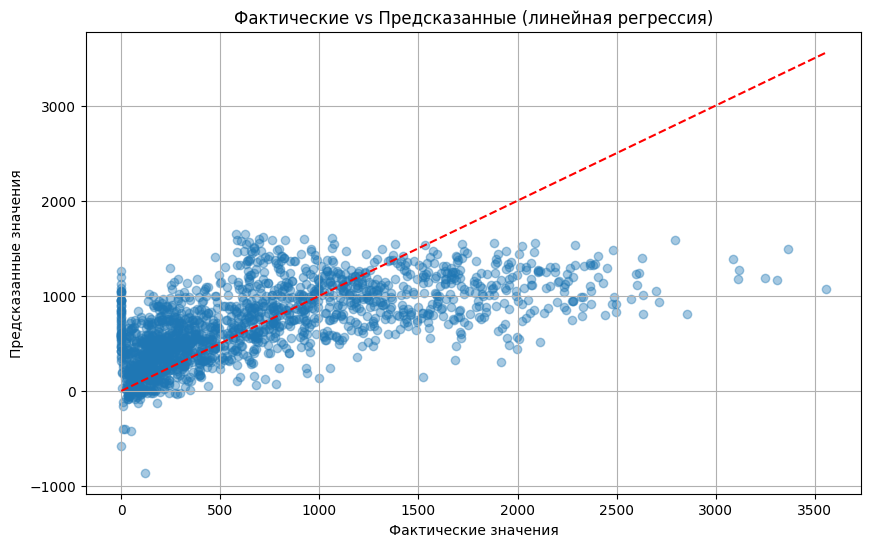

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def compute_comfort_index(row):

    rain_score = 0.5 if row['Rainfall'] == 0 else 0


    temp = row['Temperature']
    if temp < 0:
        temp_score = 0
    elif 0 <= temp <= 12:
        temp_score = 0.1
    elif 12 < temp <= 20:
        temp_score = 0.3
    else:
        temp_score = 0.5

    return rain_score + temp_score



df['comfort_index'] = df.apply(compute_comfort_index, axis=1)
plt.figure(figsize=(10, 6))
plt.scatter(df['comfort_index'], df['Rented'], alpha=0.3)
plt.xlabel('Индекс комфорта')
plt.ylabel('Количество аренд')
plt.title('Зависимость количества аренд от индекса комфорта')
plt.grid(True)
plt.show()

X = df[['Temperature', 'Rainfall', 'Humidity']]

y = df['Rented']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные (линейная регрессия)")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


#4.1 функции

Средняя аренда по периодам:
 Date
2018-09-01    1083.750000
2018-09-02    1120.041667
2018-09-03     450.083333
2018-09-04    1230.375000
2018-09-05    1296.416667
2018-09-06    1159.916667
2018-09-07    1265.875000
2018-09-08    1242.208333
2018-09-09    1181.416667
2018-09-10    1282.541667
2018-09-11    1320.583333
2018-09-12    1325.375000
2018-09-13    1291.291667
2018-09-14    1174.958333
2018-09-15    1044.958333
2018-09-16     590.750000
2018-09-17    1262.083333
2018-09-18       0.000000
2018-09-19       0.000000
2018-09-20     595.083333
2018-09-21     761.083333
2018-09-22    1099.916667
2018-09-23     835.833333
2018-09-24     719.125000
2018-09-25     972.916667
2018-09-26    1167.416667
2018-09-27    1282.875000
2018-09-28       0.000000
2018-09-29    1310.291667
2018-09-30       0.000000
Freq: D, Name: Rented, dtype: float64
Сумма аренд по периодам:
 Date
2018-09-01    26010
2018-09-02    26881
2018-09-03    10802
2018-09-04    29529
2018-09-05    31114
2018-09-06    278

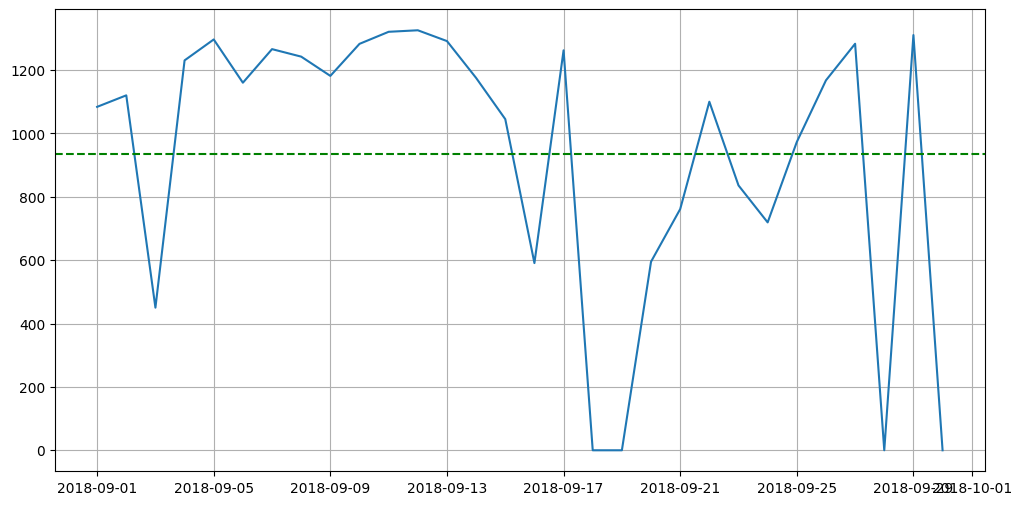

In [19]:
def generate_report(data, period):
  grouped_data = data.groupby(data['Date'].dt.to_period(period))
  mean_rent = grouped_data['Rented'].mean()
  mean = grouped_data['Rented'].mean().mean()
  sum_rent = grouped_data['Rented'].sum()
  max_rent = grouped_data['Rented'].sum().max()
  max_rent_day = sum_rent[sum_rent == max_rent]
  min_rent = grouped_data['Rented'].sum().min()
  min_rent_day = sum_rent[sum_rent == min_rent]
  print("Средняя аренда по периодам:\n", mean_rent)
  print("Сумма аренд по периодам:\n", sum_rent)
  print("Максимальная сумма аренд:", max_rent)
  print("Период с максимальной арендой:\n", max_rent_day)
  print("Минимальная аренда:", min_rent)
  print("Период минимальной аренды:", min_rent_day)
  mean_rent.index = mean_rent.index.to_timestamp()
  plt.figure(figsize=(12, 6))
  plt.plot(mean_rent)
  plt.axhline(mean, color='green', linestyle='--', label=f'Среднее: {mean:.2f}')
  plt.grid(True)


generate_report(df[september], 'D')

##Другая функция

In [24]:
def mean_rented_bikes(data, temp_ar, humidity_target, rainfall_target=0):
  filtered = data[(data['Temperature'] >= temp_ar[0]) & (data['Temperature'] <= temp_ar[1])]
  filtered = filtered[(filtered['Rainfall'] >= rainfall_target[0]) & (filtered['Rainfall'] <= rainfall_target[1])]
  filtered = filtered[(filtered['Humidity'] >= humidity_target[0]) & (filtered['Humidity'] <= humidity_target[1])]
  mean_rented = filtered['Rented'].mean()
  return mean_rented

print(mean_rented_bikes(june_df, [15, 25],  [0, 70], [0, 10]))

1396.2988047808765


#4.2 pivot_table

##Анализ прокатов по месяцам, дням недели и времени суток
Среднее количество прокатов по месяцам и дням недели \
- Создана сводная таблица с индексом — месяц, столбцами — дни недели, значениями — среднее количество прокатов.

- Позволяет увидеть сезонные и недельные тренды.

**Индекс комфорта и время дня**\
- Определены периоды суток: ночь, утро, день, вечер.

- Данные разделены на будни и выходные.

- Для каждой группы рассчитан индекс комфорта.

- Построены сводные таблицы среднего количества прокатов по индексам комфорта и времени дня для будней и выходных.

**Визуализация** \
- Построены тепловые карты для будней и выходных.

- Для будних дней использована цветовая палитра YlGnBu, для выходных — YlOrRd.

- Тепловые карты показывают, как комфорт и время дня влияют на среднее число прокатов.
**Вывод**\
В выходные и будни примерно одинаковые тренды по индексу комфорта и времени дня, вечер "единичка" самая популярная комбинация среди пользователей аренды. Единственное, что наверное можно выделить - в выходные чуть больше ночной активности, что неудивительно.

Weekday       Friday       Monday    Saturday       Sunday    Thursday  \
Month                                                                    
1         223.760417   207.716667  176.583333   174.375000  207.979167   
2         214.708333   266.625000  179.052083   170.822917  231.104167   
3         580.183333   458.208333  584.450000   386.489583  421.058333   
4         866.812500   752.533333  702.947917   553.850000  715.885417   
5        1025.656250  1231.135417  911.041667  1013.427083  708.416667   

Weekday     Tuesday   Wednesday  
Month                            
1        216.600000  199.575000  
2        282.000000  237.281250  
3        564.489583  573.218750  
4        834.260417  707.812500  
5        998.933333  840.041667  
Будни:
 DayPeriod            Вечер         День        Ночь         Утро
comfort_index                                                   
0.0             171.500000    62.000000   71.200000    48.500000
0.1             126.000000    63.066667 

/tmp/ipython-input-1206525806.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekdays['comfort_index'] = weekdays.apply(compute_comfort_index, axis=1)
/tmp/ipython-input-1206525806.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekends['comfort_index'] = weekends.apply(compute_comfort_index, axis=1)


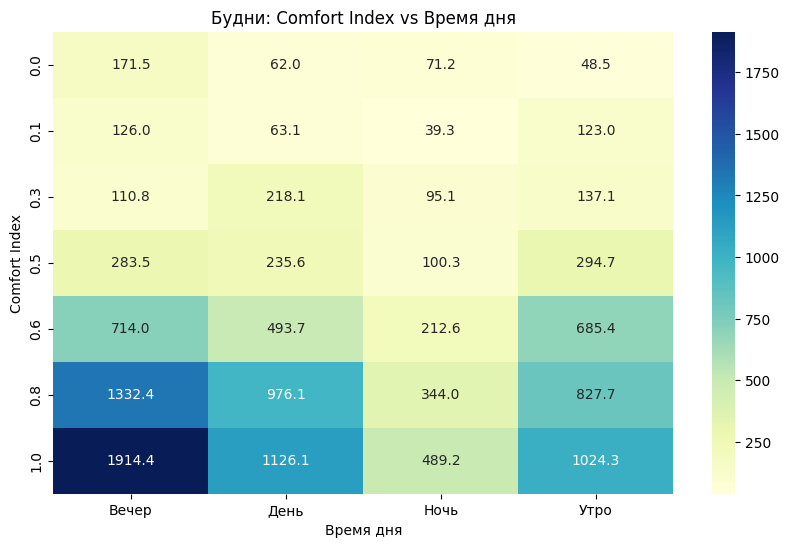

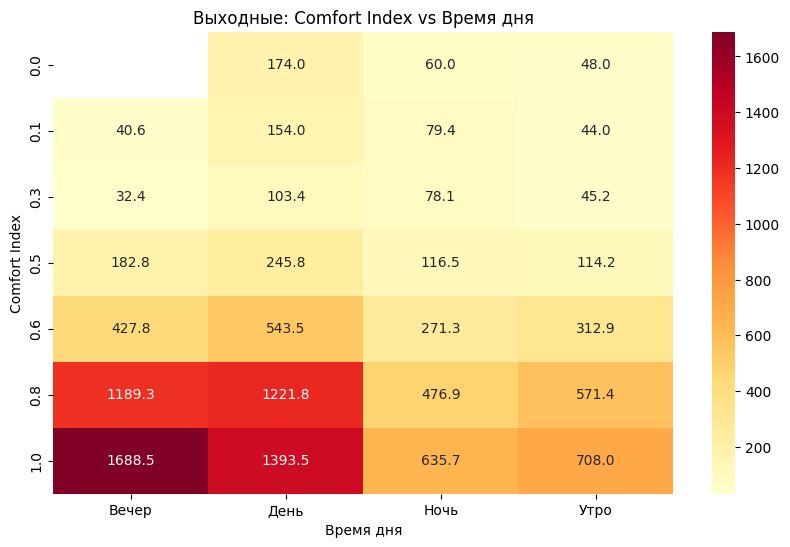

In [33]:
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()

pivot1 = pd.pivot_table(df,
                        index='Month',
                        columns='Weekday',
                        values='Rented',
                        aggfunc='mean')
print(pivot1.head())

def get_day_period(hour):
    if 0 <= hour < 6:
        return 'Ночь'
    elif 6 <= hour < 12:
        return 'Утро'
    elif 12 <= hour < 18:
        return 'День'
    else:
        return 'Вечер'
weekdays['comfort_index'] = weekdays.apply(compute_comfort_index, axis=1)
weekends['comfort_index'] = weekends.apply(compute_comfort_index, axis=1)
weather_weekdays = weekdays.copy()
weather_weekdays['DayPeriod'] = weather_weekdays['Hour'].apply(get_day_period)

pivot_weekdays = weather_weekdays.pivot_table(
    index='comfort_index',
    columns='DayPeriod',
    values='Rented',
    aggfunc='mean'
)

print("Будни:\n", pivot_weekdays)


weather_weekends = weekends.copy()
weather_weekends['DayPeriod'] = weather_weekends['Hour'].apply(get_day_period)

pivot_weekends = weather_weekends.pivot_table(
    index='comfort_index',
    columns='DayPeriod',
    values='Rented',
    aggfunc='mean'
)

print("Выходные:\n", pivot_weekends)



plt.figure(figsize=(10, 6))
sns.heatmap(pivot_weekdays, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Будни: Comfort Index vs Время дня')
plt.ylabel('Comfort Index')
plt.xlabel('Время дня')
plt.show()



plt.figure(figsize=(10, 6))
sns.heatmap(pivot_weekends, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title('Выходные: Comfort Index vs Время дня')
plt.ylabel('Comfort Index')
plt.xlabel('Время дня')
plt.show()

#дашборд

##Описание интерактивного дашборда с Plotly
###График 1: Аренда велосипедов по дням


**Функционал**:

Отображает динамику количества аренд велосипедов по датам.

Под графиком есть ползунок диапазона (range slider) для удобного выбора и приближения конкретного временного периода.

**Как пользоваться**:

Перетаскивайте и изменяйте размер ползунка, чтобы сузить отображаемый период.

Можно масштабировать и панорамировать график с помощью мыши.

###График 2: Влияние температуры и осадков на аренду


**Функционал**:

Показывает зависимость количества аренд от температуры.

Точки раскрашены в зависимости от наличия осадков (цвета: «Осадки» и «Без осадков»).

При наведении на точки отображается подробная информация.

**Как пользоваться**:

Можно выделять области графика мышью для масштабирования.

Наводите курсор на точки для получения данных по конкретным наблюдениям.

Цветовая дифференциация помогает сравнивать влияние осадков.

In [2]:
!pip install plotly

import pandas as pd
import plotly.express as px


df = pd.read_csv(
    "/content/drive/MyDrive/content/SeoulBikeData.csv",
    parse_dates=["Date"],
    dayfirst=True
)

df = df.sort_values(["Date", "Hour"])


df["RainFlag"] = df["Rainfall"].apply(lambda x: "Осадки" if x > 0 else "Без осадков")


fig1 = px.line(
    df,
    x="Date",
    y="Rented",
    title="Аренда велосипедов по дням",
    labels={"Rented": "Количество аренд"}
)
fig1.update_xaxes(rangeslider_visible=True)
fig1.show()


fig2 = px.scatter(
    df,
    x="Temperature",
    y="Rented",
    color="RainFlag",
    title="Влияние температуры и осадков на аренду",
    labels={
        "Rented Bike Count": "Количество аренд",
        "Temperature(°C)": "Температура (°C)",
        "RainFlag": "Осадки"
    }
)
fig2.show()